# Projeto ML - Titanic
**Objetivo**: Prever que tipo de pessoas eram mais propensas a sobreviver

## Importando as bibliotecas

In [1]:
# Baixando as bibliotecas ....
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# Abrindo os arquivos de treino e teste
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
data = [train,test]

In [3]:
# Verificando as 5 primeiras linhas do arquivo de treino
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Verificando as 5 primeiras linhas do arquivo de teste
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Colunas do Dataset

**PassengerId**: Código do Passageiro.
    
**Survived**:  Não = 0, Sim = 1

**Pclass**: Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º

**Name**: Nome do Passageiro

**Sex**: Sexo do passageiro

**Age**: Idade em anos

**SibSp**: Quantidade de irmãos / cônjuges a bordo do Titanic

**Parch**: Quantidade de pais / crianças a bordo do Titanic

**Ticket**: Número do bilhete de embarque

**Fare**: Tarifa paga pelo Passageiro

**Cabin**: Número de cabine

**Embarked**: Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)



In [5]:
# Verificando as informaçoes do dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Pelo acima as colunas cabin, embarked e Age possuem menos entradas comparadas as demais. Possivelmente por terem missing values.**
* Além disso, para a nossa análise as colunas cabin, Name e embarked não são relevantes.

## Pre-processamento

In [6]:
# Vamos apagar as colunas cabin, Name e  embarked
train.drop(columns = 'Cabin', axis =1, inplace =  True)
train.drop(columns = 'Ticket', axis = 1, inplace = True)
test.drop(columns = 'Cabin', axis =1, inplace =  True)
test.drop(columns = 'Ticket', axis = 1, inplace = True)
train.drop(columns = 'Name', axis = 1, inplace = True)
test.drop(columns = 'Name', axis =1, inplace =  True)

In [7]:
# Subsituindo os valores categóricos por numéricos da coluna Sex.
for x in data:
    x.Sex.replace('female', 1, inplace = True)
    x.Sex.replace('male', 2, inplace = True)

In [8]:
# Pessoas que sobreviveram e de mortos
sobreviventes = train.Survived.sum()
mortos = 891 - sobreviventes
print(" O numero de sobreviventes é de: ",sobreviventes, "que equivale a :", round(sobreviventes/891, 2)*100, '% da população.')
print(" O numero de mortos é de: ",mortos, 'que equivale a:', round(mortos/891, 2)*100, '% da população.')

 O numero de sobreviventes é de:  342 que equivale a : 38.0 % da população.
 O numero de mortos é de:  549 que equivale a: 62.0 % da população.


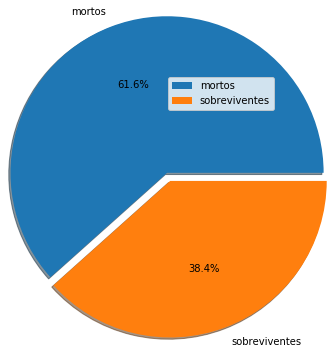

In [9]:
%matplotlib inline
total = train.Survived.value_counts()
explode = [0.1,0]
plt.pie(total, labels=('mortos', 'sobreviventes'), autopct ='%1.1f%%', radius=1.8, shadow = True, explode = explode )
plt.legend()
plt.show()

 * **Claramente a quantidade de mortos foi maior do que a de sobreviventes**

## Sexo

In [10]:
# Separação de passageiros por sexo
mulheres = train.Sex[train.Sex == 1].value_counts()

In [11]:
# Separação de passageiros por sexo
homens = train.Sex[train.Sex == 2].value_counts()

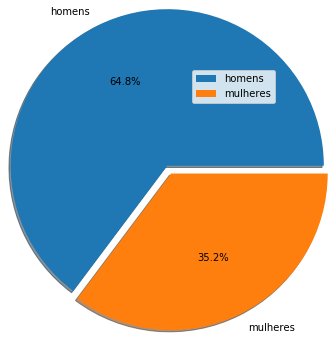

In [12]:
# Gráfico que mostra a relação de homens e mulheres que embarcaram no navio
%matplotlib inline
total = train.Sex.value_counts()
explode = [0.1,0]
plt.pie(total, labels=('homens', 'mulheres'), autopct ='%1.1f%%', radius=1.8, shadow = True, explode = explode )
plt.legend()
plt.show()

In [13]:
# Tabela de sobreviventes por sexo em cada uma das classes
pd.crosstab(train['Survived'],train['Sex'])

Sex,1,2
Survived,,
0,81,468
1,233,109


* Embora tenham entrado mais homens no navio, as mulheres foram maioria em questão de sobrevivência.

In [14]:
train.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex
1       2      122
        1       94
2       2      108
        1       76
3       2      347
        1      144
Name: Sex, dtype: int64

In [15]:
# Estabelecendo a relação entre classes e sexo
pd.crosstab(train.Sex, train['Pclass'])

Pclass,1,2,3
Sex,,,
1,94,76,144
2,122,108,347


In [16]:
# Estabelecendo relação entre sobreviventes, sexo e classes onde se encontravam.
pd.pivot_table(train, index = ['Pclass', 'Sex'], values = 'Survived', aggfunc = np.sum)

Survived
Pclass Sex          
1      1          91
       2          45
2      1          70
       2          17
3      1          72
       2          47

* **O que mostra que as mulheres da primeira classe sobreviveram em maior numero**

(array([0, 1]), <a list of 2 Text xticklabel objects>)

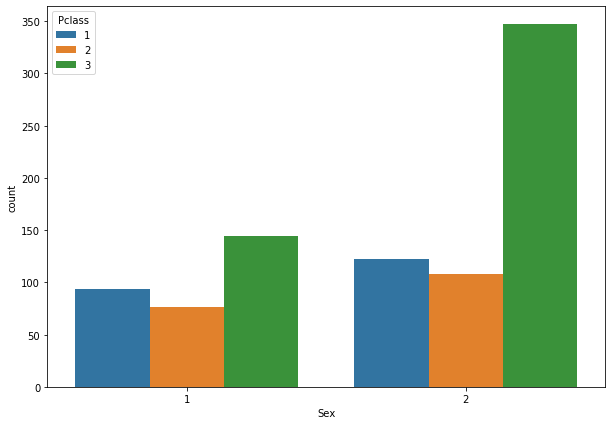

In [17]:
# Distribuição das classes por Nível de Escolaridade
plt.figure(figsize=(10,7))
sns.countplot(data=train, x = 'Sex',  hue = 'Pclass')
plt.xticks()

### Classe

In [18]:
# Contando o quantidade de pessoas em cada classe
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# Dividindo as Classes do Titanic
ClasseA = train.Pclass[train.Pclass == 1]
ClasseB = train.Pclass[train.Pclass == 2]
ClasseC = train.Pclass[train.Pclass == 3]

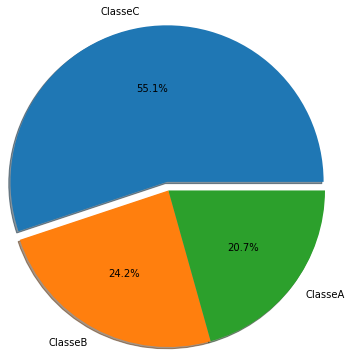

In [20]:
# Gráfico de como estavam divididas as classes de passageiros
%matplotlib inline
total = train.Pclass.value_counts()
explode = [0.1, 0, 0]
plt.pie(total, labels = ('ClasseC', 'ClasseB', 'ClasseA'), autopct = '%1.1f%%', shadow = True, radius= 1.8, explode = explode)
plt.show()

In [21]:
# Verificando quantos a relação entre sobreviventes e as classes que faziam parte
pd.pivot_table(train, index = ('Pclass'), values = ('Survived'), aggfunc = np.sum)

,Survived
Pclass,
1,136
2,87
3,119


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

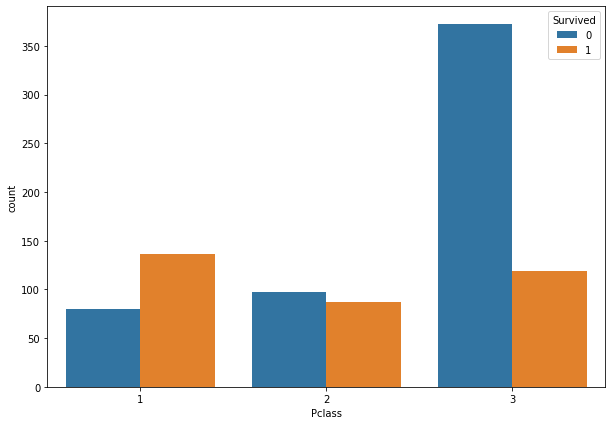

In [22]:
plt.figure(figsize = (10, 7))
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.xticks()

## Idade

* **Precisamos tratar essa coluna, haja vista, que já percebemos que ela possue muitos missing values.**
* **Podemos aproveitar para checar a relevância da idade na sobrevivencia de determinado passageiro.**

In [23]:
# Verificando a quantidade de passageiros sem idade
train['Age'].isnull().sum()

177

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

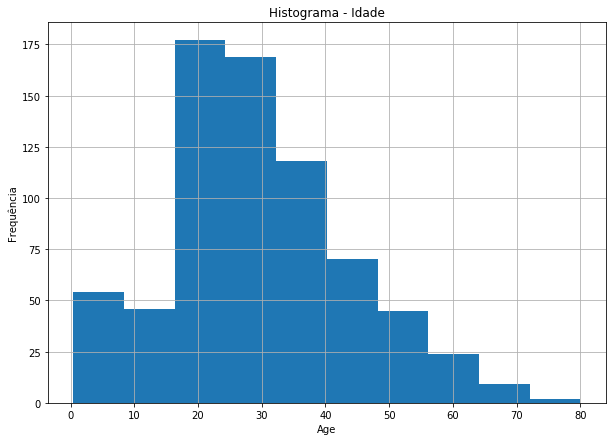

In [24]:
%matplotlib inline
plt.figure()
train.hist(column = 'Age', bins = 10, figsize = (10,7))
plt.title ("Histograma - Idade")
plt.xlabel("Age")
plt.ylabel("Frequência")

##### Olhando para o histograma é possível estimar que a maioria dos passageiros que informaram idade tinham entre 17 e 33 anos.

In [25]:
# Tratando os missing values
train.Age.fillna(train['Age'].mean(), inplace = True)
test.Age.fillna(test['Age'].mean(), inplace = True)

In [26]:
# Dividindo a coluna Idade (Age) em 4 intervalos categóricos.
train.Age = pd.cut(train.Age, [0,12,17,40,90], labels = ['child','young', 'adult', 'old'])
test.Age = pd.cut(test.Age, [0,12,17,40,90], labels = ['child', 'young', 'adult', 'old'])

In [27]:
# Contabilizando a quantidade de pessoas em cada partiçãoç
train.Age.value_counts()

adult    628
old      150
child     69
young     44
Name: Age, dtype: int64

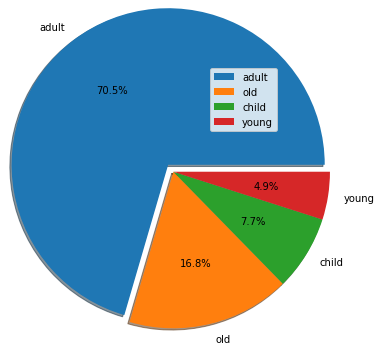

In [28]:
%matplotlib inline
explode = [0.1, 0, 0, 0]
total = train.Age.value_counts()
plt.pie(total, labels = ('adult', 'old', 'child', 'young'), autopct = '%1.1f%%', radius = 1.8, shadow = True, explode = explode)
plt.legend()
plt.show()

In [29]:
pd.pivot_table(train, index = ('Age'), values = ('Survived'), aggfunc = np.sum)

,Survived
Age,
child,40
young,21
adult,226
old,55


In [30]:
# Distribuição dos sobreviventes de casa classe por idade.
pd.pivot_table(train, index = ['Pclass', 'Age'], values = 'Survived', aggfunc = np.sum)

Survived
Pclass Age            
1      child         3
       young         8
       adult        86
       old          39
2      child        17
       young         4
       adult        53
       old          13
3      child        20
       young         9
       adult        87
       old           3

## Tratando variáveis categóticas

In [31]:
# Transformando colunas categóricas em numéricas
num = ['Embarked', 'Age']

for x in num:
    train = pd.get_dummies(train, columns = [x], prefix = [x])
    

In [32]:
for x in num:
    test = pd.get_dummies(test, columns = [x], prefix = [x])

In [33]:
media = test.Fare.mean()
print(media)

35.6271884892086


In [34]:
# Tratando valores nulos
test.Fare.fillna(media, inplace = True)

In [35]:
test.Fare.isnull().sum()

0

## Separando os dados de treino e de teste

In [36]:
# Separando dados de treino e de teste
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

## Instânciando o modelo

In [38]:
random_clf = RandomForestClassifier(random_state=0)

## Treinando o modelo

In [39]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Executando o modelo

In [40]:
resultado = random_clf.predict(X_test)
resultado

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

## Cross validation

In [41]:
#from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_clf, X, y)
scores

array([0.72067039, 0.79213483, 0.8258427 , 0.83707865, 0.84831461])

In [42]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       159
           1       0.78      0.73      0.76       109

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## Definindo a função Acurácia

In [43]:
# Testando a acurácia do modelo
def Acuracia(random_clf,X,y):
    resultados = cross_val_predict(random_clf, X, y)
    return metrics.accuracy_score(y,resultados)

In [44]:
Acuracia(random_clf,X, y)

0.8047138047138047

## Tunning do Modelo 


In [45]:
# Criando vários Pipelines

# Pipeline com o pré-processador  MinMaxScaler:
pip_1 = Pipeline([      
    ('min_max_scaler', MinMaxScaler()),
    ('clf',RandomForestClassifier(max_depth = 5))
])
# Pipeline com o pré-processador  MinMaxScaler e definindo um parâmetro para o modelo:
pip_2 = Pipeline([              
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(max_depth=3))
])
# Pipeline com o pré-processador  StandardScaler e definindo um parâmetro para o modelo:
pip_3 = Pipeline([              
    ('standardscaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=3))
])

In [46]:
pip_1.fit(X_train,y_train)
acuracia1 = pip_1.score(X_test, y_test)
acuracia1

0.8097014925373134

In [47]:
pip_2.fit(X_train,y_train)
acuracia2 = pip_2.score(X_test, y_test)
acuracia2

0.7798507462686567

In [48]:
pip_3.fit(X_train,y_train)
acuracia3 = pip_3.score(X_test, y_test)
acuracia3

0.7649253731343284

###### Como o pip_2 teve o melhor resultado, vamos escolhe-lo como nosso pipeline final.

In [244]:
pip_1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('min_max_scaler',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=3, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [245]:
pip_2.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

## GridSearch


In [246]:
# Parâmetros para fazer o grid
parametros_grid = dict(clf__max_depth=[3,4,5,6,7,8,9,10])

# Cria objeto gridsearch com os parâmetros definidos e a configuração de validação cruzada com 5 folds
grid = GridSearchCV(pip_2, param_grid=parametros_grid, cv=5, scoring='accuracy')

In [247]:
#Executa o GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('min_max_scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=3,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                            

In [248]:
grid.cv_results_

{'mean_fit_time': array([0.17749801, 0.17629986, 0.16830697, 0.17330451, 0.17409978,
        0.17670255, 0.17929735, 0.18209925]),
 'std_fit_time': array([0.01936989, 0.01335818, 0.00102125, 0.00279653, 0.00172651,
        0.00040182, 0.00079958, 0.00213629]),
 'mean_score_time': array([0.01099315, 0.01119285, 0.01158915, 0.01159286, 0.01219268,
        0.01199288, 0.01179318, 0.0117928 ]),
 'std_score_time': array([3.56832255e-07, 7.48188065e-04, 4.86611411e-04, 4.89784651e-04,
        9.79530253e-04, 4.86280395e-07, 3.99732661e-04, 3.99899948e-04]),
 'param_clf__max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 3},
  {'clf__max_depth': 4},
  {'clf__max_depth': 5},
  {'clf__max_depth': 6},
  {'clf__max_depth': 7},
  {'clf__max_depth': 8},
  {'clf__max_depth': 9},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.

In [249]:
# Verificando os melhores parametros
grid.best_params_

{'clf__max_depth': 9}

In [250]:
# Verificando o melhor resultado
grid.best_score_

0.8428129032258065

## Submission ao Kaggle

In [191]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = random_clf.predict(test) 

In [192]:
submission.to_csv('submission.csv', index = False)